<a href="https://colab.research.google.com/github/MarcosCosta-Py/QuarentenaDados/blob/master/QuarentenaDados_Aula02_(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 2: Médias, medianas e visualização de dados.**

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso Boxplot.

Para inciar vamos precisar resolver alguns dos desafios deixados na **aula 01** (Caso não tenha tentado resolver os desafios, recomendo tentar algumas vezes antes de olhar as repostas). Começando pelo exercício 05, onde precisamos segregar os gêneros de cada um dos filmes contidos na base de dados do **Movie Lens**.

Vamos relembrar como os dados estavam configurados.

In [0]:
# importando as bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [0]:
# Lendo os arquivos necessários:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ['filmesId','titulo','generos']
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmesId", "nota", "momento"]

In [0]:
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Temos os títulos e uma coluna com os respectivos gêneros, todos em uma única coluna, cada *label* é separada com um **|** (Adventure|Children|Fantasy) sendo do tipo *string*. 

Para solucionar nosso problema precisamos separar cada um dos gêneros para então realizar a contagem. Existe várias formas de resolver este problema, por exemplo, desde métodos inputos das *strings* até as **regex**, mas como estamos usando o pandas já temos algo para facilitar nosso processamento dos dados. 

Vamos aplicar o método e logo em seguida explicar a saída geranda.

In [0]:
generos_logic = filmes["generos"].str.get_dummies('|')
generos_logic

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nossa, uma linha de código gerou essa tabelona cheia de linhas, colunas e números.


Como você percebeu a saída é um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero **único** virou uma coluna no DF). O que você deve estar se perguntando é como os valores **0/1** são preenchidos?.

Para explicar, vamos pegar os gêneros do filme **Jumanji**, **Adventure|Children|Fantasy**, na coluna dos repectivos gêneros (dataframe gerado por ```filmes["generos"].str.get_dummies('|')```) o valor será **1**, para todos os outros gêneros, que não são gêneros do filme Jumanji, vale **0**. Em suma, se o nome da coluna pertence a algum gênero do respectivo filme, o valor será **1** caso contrário 0.

In [0]:
soma_gen_logi = generos_logic.sum()
soma_gen_logi

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Ótimo, resolvemos o desafio e agora temos quantas vezes cada gênero aparece. Assim, fica fácil de reponder perguntas como, qual o gênero com mais filmes produzidos? Qual o menos? Qual o segundo? (Lembrando que o dado está restrito as informações do movie lens)

Se você tentou responder, deve ter notado que não foi tão fácil assim, as informações não estão ordenadas e toda hora você precisa percorrer a tabela para fazer comparações. Nós podemos melhor isso ordenando as informações.

In [0]:
soma_gen_logi.sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Maravilha, agora tudo ficou mais fácil! 

Conseguimos responder as perguntas anterior sem grandes dificuldades. Mas ainda podemos melhor mais a forma de expor nossa informação, não acha? 

Que tal uma imagem para visualizar? (Desafio 07 da aula 01)

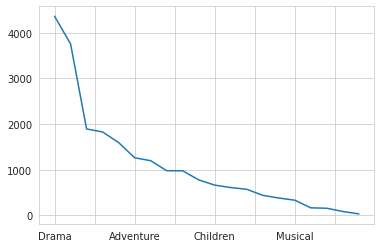

In [0]:
soma_gen_logi.sort_values(ascending=False).plot()

Iniciamos com o plot padrão do pandas, e como percebemos não adianta só plotar uma imagem, é preciso que faça sentido para a informação que queremos analisar, um gráfico de linhas não está fazendo muito sentido!

Temos um gráfico muito conhecido que sempre encontramos por aí, o famoso gráfico de pizza ou torta. 

Já que ele é tão famoso talvez seja uma boa ideia tentar!

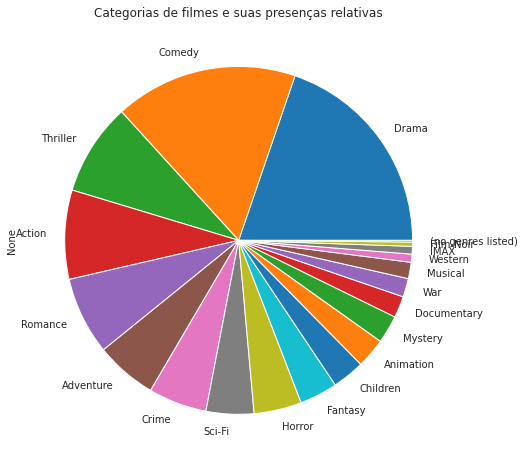

In [0]:
soma_gen_logi.sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

E aí o que você achou? 

Algo que fica evidente neste gráfico é que **Drama, Comedy, Thriller, e Action** tem proporções "grandes", mas qualquer outra análise fica complicada. 

Primeiro, as cores começa a se repetir e isso não é o ideial.

Segundo, repare nos gêneros com menos filmes,consegue tirar alguma informação de lá? é muito difícil de analisar.

Terceiro, vamos tentar comparar **thriller e Action**, qual está presente em mais filmes? Difícil responder, quando estamos trabalhando com gráficos tipo esse fazemos comparações entre área, não somos bons nisso.


Por fim, o importante de uma visualização é que ela seja **"transparente"** ao intuíto de nossa análise. Ou seja, estamos querendo analisar as informações de quantidade, comparando as labels de forma geral e evidênciando de maneira clara as diferenças entre elas (proporções).

Portanto, o gráfico de pizza não torna as comparações claras, sendo assim uma má ideia. 

Vamos construir juntos uma solução mais adequada!

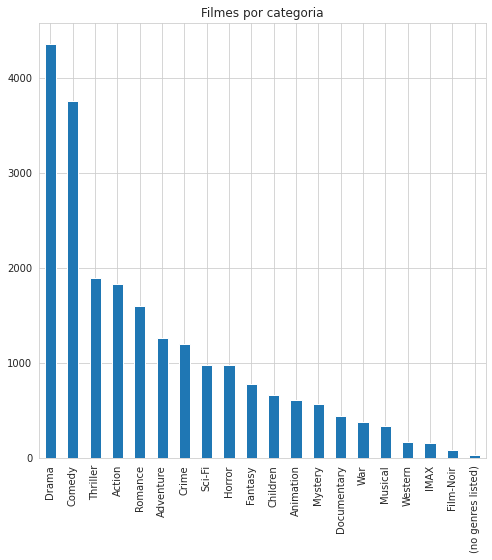

In [0]:
soma_gen_logi.sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

Mudamos da pizza para a barra, alterando apenas o parâmetro kind do método.

 Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre **Drama e Comedy**, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar **Thriller e Action**, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tornar evidênte essa informação vamos utilizar algo "semelhante" a um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map).

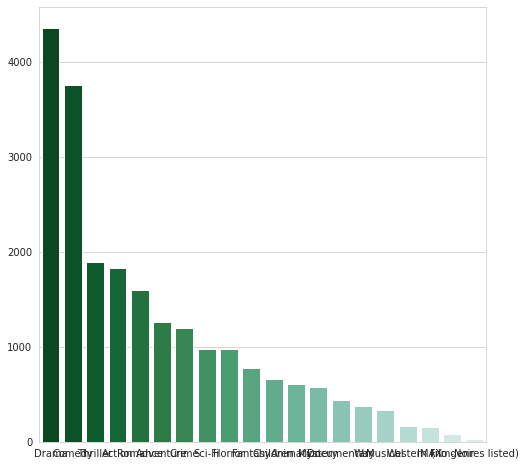

In [0]:
# Desenvolvendo o gráfico com Seaborn
filmes_por_genero = soma_gen_logi.sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

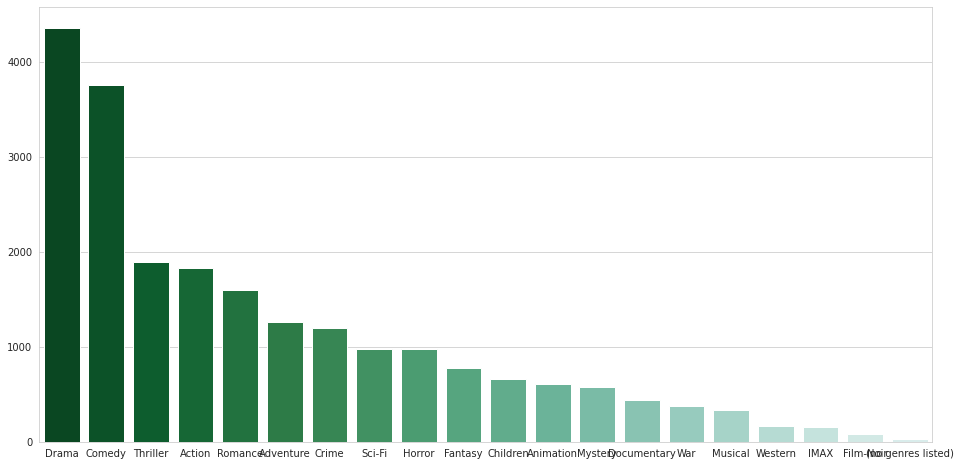

In [0]:
# Melhorando o gráfico desenvolvido acima
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Já, já explicamos o que foi feito em toda imagem, por agora repare como a imagem passa muito mais informação. Conseguimos comparar de forma fácil entre os gêneros e através do **mapa de calor** (gêneros com maior número tem um verde muito mais forte, gêneros com menor número é praticamente transparente) evidênciamos quais são as labels com maior participação, médias e insignificantes. Toda essa informação em uma única imagem!

Bom, agora vamos entender como foi o código.

Primeiro, não plotamos mais a imagem com o `.plot()` do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o [seaborn](https://seaborn.pydata.org/).

Segundo, chamamos o barplot do **seaborn**, adicionando uma **paleta de cores** com efeito de mapa de calor (parâmetro pallette), no parâmetro `n_color` de `sns.color_palette()` adicionamos **+4** para que a última barra não seja totalmente transparente.

Terceiro, também adicionamos o **sns.set_style("whitegrid")** para que todos os gráficos tenham a **linha de grade do eixo X** evidênte, facilitando a comparação entre as barras.

Por fim, mudamos o tamanho da imagem com o **figsize** do método`plt.figure()`. Assim, temos um gráfico com muitas informações e agradável de analisar.

Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na **aula 01** calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [0]:
notas_medias_por_filmes = avaliacoes.groupby('filmesId')['nota'].mean()
notas_medias_por_filmes

filmesId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filmes, on='filmesId')
filmes_com_media.head()

,filmesId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das notas para comparar alguns filmes. Por exemplo, **Toy Story e Jumanji**

3.9209302325581397


Text(0.5, 1.0, 'Notas para Toy Story')

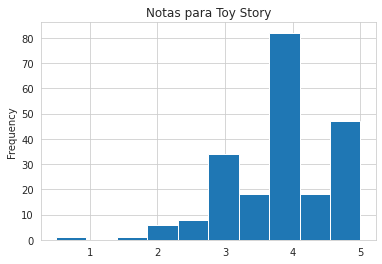

In [0]:
# Média das notas do filme 1 e seu histograma.
notas_do_filme_1 = avaliacoes.query("filmesId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')
plt.title('Notas para Toy Story')

In [0]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

3.4318181818181817


Text(0.5, 1.0, 'Notas para Jumanji')

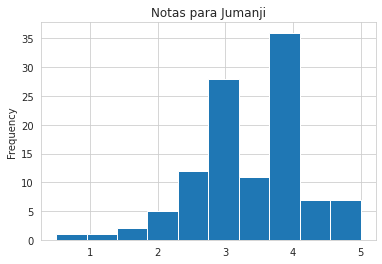

In [0]:
# Média das notas do filme 2 e seu histograma.
notas_do_filme_2 = avaliacoes.query("filmesId==2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')
plt.title('Notas para Jumanji')

In [0]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados. 

Lembra o exemplo que o Guilherme Silveira deu em aula comparando os sálarios de uma cidade? Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades. 

```python
#Cidada A
populacao = 1000
salario = 1100

media = 1100

#Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100

media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00
```

Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a [mediana](https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica))

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [0]:
filmes_com_media.sort_values("nota", ascending=False)[2450:2500]

,filmesId,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


Bom, ordenando os filmes pela nota médias e [fatiando](https://www.alura.com.br/artigos/listas-no-python) os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime *Wizard of Oz, **filmeId=919** e *Little Miss Sunshine* **filmeId=46578**.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmesId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

Definimos nossa [função plot em python](https://www.caelum.com.br/apostila-python-orientacao-objetos/funcoes/#parmetros-de-funo) e repare que estamos usando **F-string** para fazer a interpolação dos dados, se tiver tiver dúvida veja essa [explicação no fórum da alura](https://cursos.alura.com.br/forum/topico-para-que-serve-o-print-f-no-python-77720).

Agora precisamos chamar a função!

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

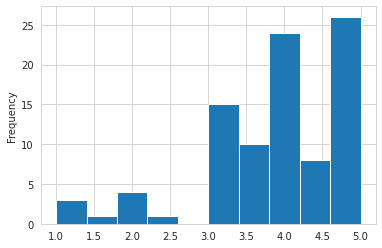

In [0]:
#Mágico de Oz
plot_filme(919)

A função plot, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a função agora para o filme *Little Miss Sunshine*.

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

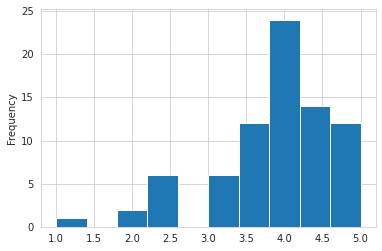

In [0]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

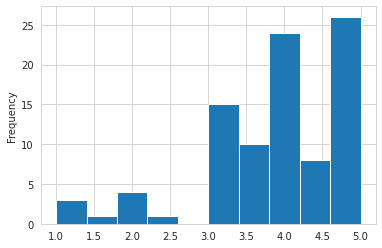

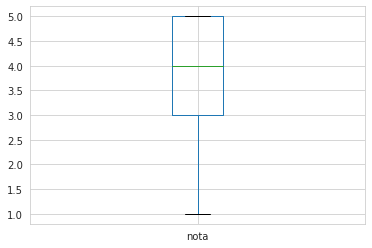

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmesId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

E aí, viu como é simples criar criar um [boxplot com o pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)?

Apenas chamamos o método ```.plot.box()```, agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.

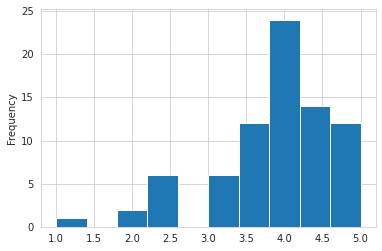

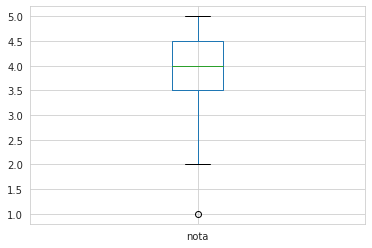

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(46578)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em **y=1**. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de [outliers](https://pt.wikipedia.org/wiki/Outlier), existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do [wikipedia](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o **seaborn**, para aprendermos outra forma de plotar boxplot!


In [0]:
# Fazendo uma verificação de qual filmes os ids se refere.
filmes_com_media.query('filmesId in [1,2,919,46578] ')

,filmesId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,3.880435
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama,3.883117


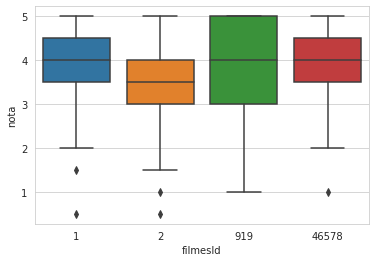

In [0]:
sns.boxplot(data = avaliacoes.query("filmesId in [1,2,919,46578]"), x ="filmesId", y="nota")

Com base nos Box-Plots dispostos acima, é possível observar que todos eles possuem uma simetria dentre os 50% dos dados centrais, com tudo, em relação a 100% dos dados, temos uma assimetria a esquerda. Em relação aos filmes Toy Story e Little Miss Sunchine há uma distribuição muito semelhante , ao qual concentra-se 50% dos dados centrais entre os valores 3.5 e 4.5, o que implica um maior número de avaliações com notas dentro desse intervalo, ademais Toy Story possui duas notas fora do padrão dos dados e Little Miss possui uma.

Em relação ao filme Jumanji, percebe-se que há uma concentração maior de notas no intevalo de 3 a 4 e dois valores foras do padrão.

Com relação Wizard of Oz, temos uma concentração de 50% das notas em um intervalo maior, de 3 a 5, implicando em uma distribuição com maior variabilidades entre os dados, contudo não há valores fora do padrão.

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o `.query()` para selecionar os dados), **x** é o Id do filme e **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais clara.


Com isso nós fechamos nossa segunda aula do **#quarentenadados**

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

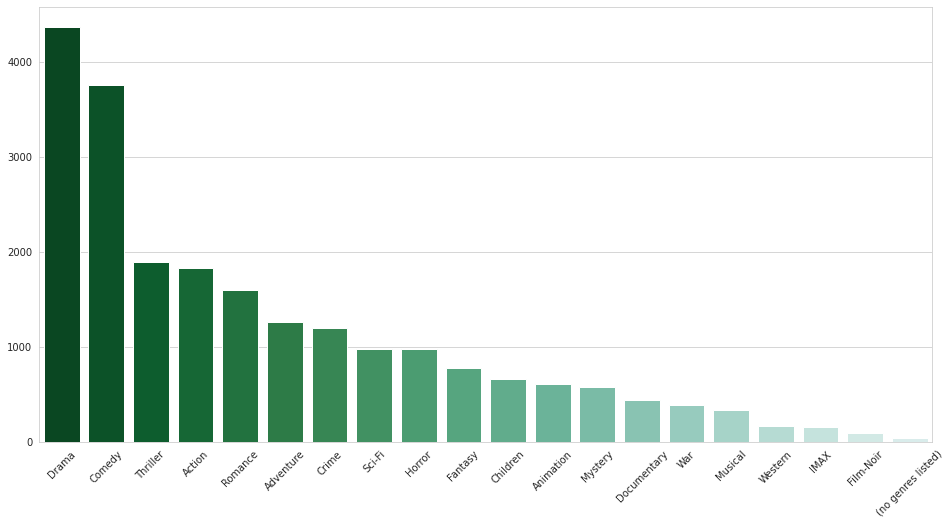

In [0]:
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
filmes_com_media.shape[0]

9742

In [0]:
lista = filmes_com_media.sort_values("nota", ascending=False)[5000:5200].tail(4)['filmesId']
lista_o = list(lista)
lista_o

[107, 216, 2990, 2133]

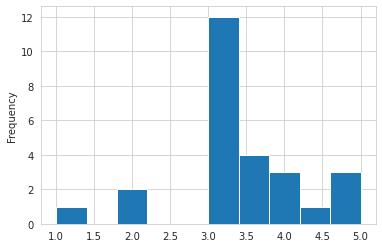

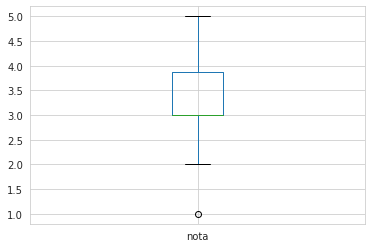

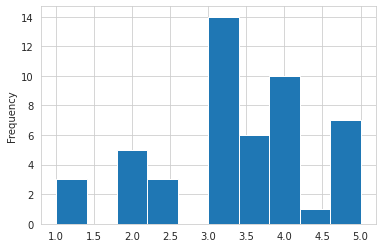

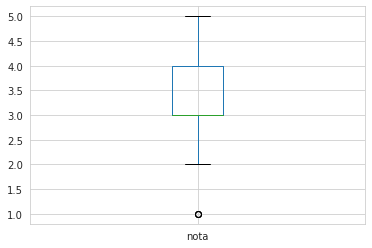

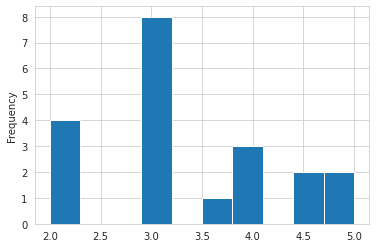

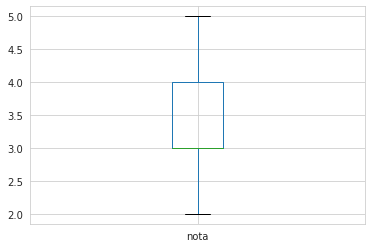

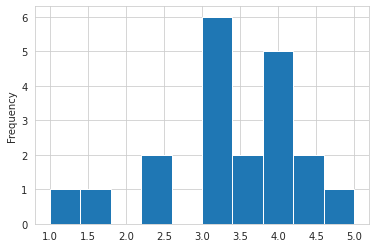

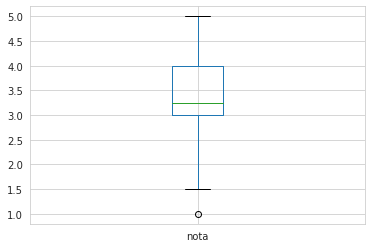

In [0]:
for i in lista_o:
  plot_filme(i)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
total_votos = avaliacoes.groupby('filmesId').size().sort_values(ascending=False)
total_votos.name = 'total_votos'
filmes_com_media.rename(columns={'nota':'nota_media'}, inplace=True)

In [0]:
filmes_com_media_voto = filmes_com_media.join(total_votos,on='filmesId')
filmes_com_media_voto.head()

,filmesId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [0]:
votos = avaliacoes.query('filmesId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]')
votos.shape

(2680, 4)

In [0]:
dez_mais_votos = filmes_com_media_voto.sort_values('total_votos',ascending=False).head(10)
df_final = dez_mais_votos.merge(votos,on='filmesId',how='left')
df_final.head()

,filmesId,titulo,generos,nota_media,total_votos,usuarioId,nota,momento
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0,1,4.0,964980962
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0,6,5.0,845553200
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0,7,5.0,1106635915
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0,8,3.0,839463527
4,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0,10,3.5,1455301685


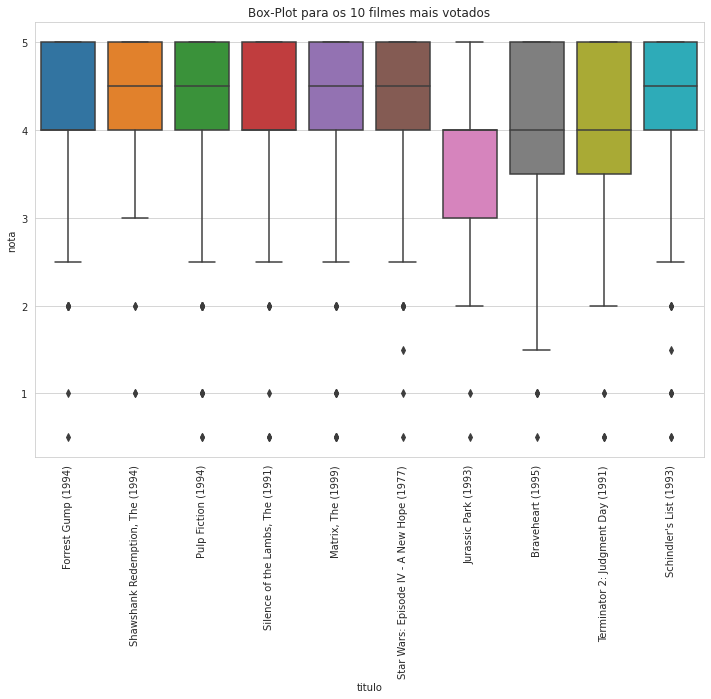

In [0]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.title('Box-Plot para os 10 filmes mais votados')
sns.boxplot(x='titulo',y='nota',data=df_final)

Com base nos Box-Plots dispostos acima, logo de cara percebemos que todos eles possuem valores fora do padrão abaixo do limite inferior, sendo denominado com maior frequência entre a maioria dos gráficos, como notas iguais ou abaixo de 2. 

Como se trata dos 10 filmes mais votados, para se ter tantas avaliações deve ser porque os filmes são muito bons ou muito ruins, e percebemos de acordo com a assimetria a esquerda, que a concentrção de notas são as mais altas(frequência maior entre 4 e 5, em 7 dos 10 gráficos), implicando em filmes bem avaliados.

Há um destaque para o Box-Plot do filmes Jurassic Park, ao qual tem um concentrção de 50% dos dados centrais entre 3 e 4, implicando dentre os filmes mais votados a frequência de notas mais infeirores.

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [0]:
data = avaliacoes.query("filmesId in [1,2,919,46578]")
data.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
44,1,919,5.0,964982475
356,4,919,5.0,945079521
516,5,1,4.0,847434962
560,6,2,4.0,845553522


In [0]:
titulos_b = filmes.query('filmesId in [1,2,919,46578]')
titulos_b.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama


In [0]:
df_com_titulo = data.merge(titulos_b,on='filmesId', how='left')
df_com_titulo

,usuarioId,filmesId,nota,momento,titulo,generos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,919,5.0,964982475,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical
2,4,919,5.0,945079521,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,6,2,4.0,845553522,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
489,608,919,2.5,1117408378,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical
490,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
491,610,1,5.0,1479542900,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
492,610,919,3.5,1493850305,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical


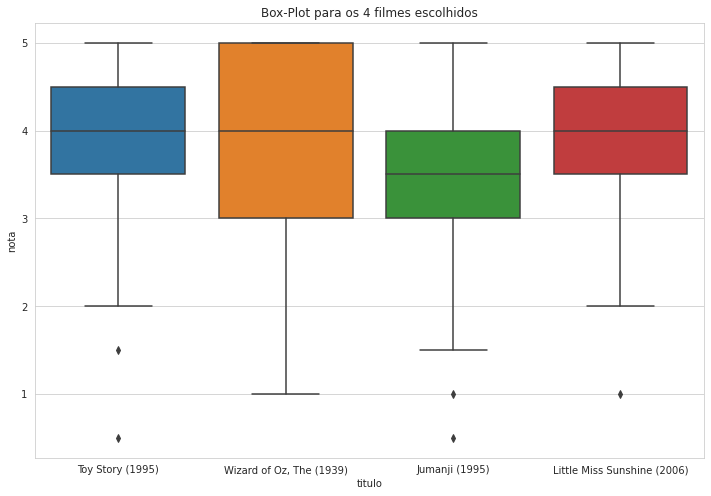

In [0]:
plt.figure(figsize=(12,8))
plt.title('Box-Plot para os 4 filmes escolhidos')
sns.boxplot(data = df_com_titulo, x ='titulo', y="nota")

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

Media e mediana calcular normal, criar função para seleção dos valores próximos definidos e enois.


In [0]:
# Importando a biblioteca numpy e fazendo uma cópia do DataFrame para trabalhar com novas alterações 
import numpy as np
df_moda = filmes_com_media.copy()

In [0]:
# Retirando os valores faltantes para que seja excluido os Ids desses filmes e salvando os demais Ids em uma lista.
df_original = df_moda.dropna()
df_ids = list(df_original['filmesId'])

In [0]:
# Selecionando a coluna nota e fazendo a frequência delas por Ids.
mmm = avaliacoes.groupby('filmesId')['nota'].value_counts()
mmm

filmesId  nota
1         4.0     82
          5.0     47
          3.0     34
          3.5     18
          4.5     18
                  ..
193581    4.0      1
193583    3.5      1
193585    3.5      1
193587    3.5      1
193609    4.0      1
Name: nota, Length: 30417, dtype: int64

In [0]:
# Transformando os dados acimas em uma DataFrame, renomeando uma coluna nota para frequência e apresentando as 5 primeiras linhas.
df = pd.DataFrame(mmm)
df.rename(columns={'nota':'frequencia'}, inplace=True)
df.head()

frequencia
filmesId nota            
1        4.0           82
         5.0           47
         3.0           34
         3.5           18
         4.5           18

In [0]:
# Verificando como pode ser extraido o valor da nota com maior frequência em cada filme.
moda = df.loc[25827]['frequencia']
modal = pd.DataFrame(moda)
lista = list(modal.index)[0]

In [0]:
# Criando uma lista com o Id do filme e a nota com maior frequência(moda) determinada na ordem do algoritmo computacional.
lista_moda = []
for i in df_ids:
  moda = df.loc[i]['frequencia']
  v_modal = pd.DataFrame(moda)
  valor_modal = list(v_modal.index)[0]
  lista_moda.append([i,valor_modal])

In [0]:
# Imprimindo a lista 
print(lista_moda, end='')

[[1, 4.0], [2, 4.0], [3, 3.0], [4, 3.0], [5, 3.0], [6, 4.0], [7, 3.0], [8, 3.0], [9, 3.0], [10, 3.0], [11, 4.0], [12, 1.0], [13, 3.0], [14, 4.0], [15, 4.0], [16, 4.0], [17, 4.0], [18, 4.0], [19, 2.0], [20, 2.0], [21, 4.0], [22, 3.0], [23, 3.0], [24, 3.0], [25, 4.0], [26, 4.0], [27, 3.0], [28, 4.5], [29, 4.0], [30, 4.0], [31, 3.0], [32, 4.0], [34, 4.0], [36, 4.0], [38, 1.0], [39, 3.0], [40, 3.5], [41, 4.0], [42, 3.0], [43, 3.0], [44, 2.0], [45, 3.0], [46, 3.0], [47, 4.0], [48, 3.0], [49, 3.0], [50, 5.0], [52, 3.0], [53, 5.0], [54, 1.0], [55, 4.0], [57, 3.0], [58, 5.0], [60, 3.0], [61, 4.0], [62, 3.0], [63, 3.0], [64, 2.0], [65, 3.0], [66, 3.0], [68, 3.0], [69, 4.0], [70, 4.0], [71, 2.0], [72, 4.0], [73, 4.0], [74, 4.0], [75, 3.0], [76, 4.0], [77, 4.0], [78, 3.0], [79, 2.0], [80, 4.0], [81, 3.0], [82, 5.0], [83, 3.0], [85, 5.0], [86, 4.0], [87, 3.0], [88, 2.0], [89, 4.0], [92, 2.0], [93, 3.0], [94, 4.0], [95, 3.0], [96, 3.5], [97, 3.0], [99, 5.0], [100, 3.0], [101, 4.0], [102, 1.0], [103

In [0]:
# Ordenando a matriz de com Ids e moda dos filmes
from operator import itemgetter
matrix_ordenada = []
sub_matrix_ordenada = sorted(lista_moda[:],key=itemgetter(1))
for elem in sub_matrix_ordenada:
    matrix_ordenada.append(elem)

In [0]:
# Selecionando aleatóriamente 2 amostras de filmes para modas próximas de 0.5, 3 e 5.
np.random.seed(72)
df_moda_ = pd.DataFrame(matrix_ordenada)
df_moda_.columns =["id","nota"]
df_moda_b = df_moda_.query('0.5 <= nota < 1').sample(2)
df_moda_m = df_moda_.query('2.8 <= nota < 3.5').sample(2)
df_moda_a = df_moda_.query('4.5<= nota < 5').sample(2)
print('Moda próxima de 0.5: {}, "\n" Moda próxima de 3.5: {}, "\n", Moda próxima de 5: {}'.format(df_moda_b,df_moda_m,df_moda_a))

Moda próxima de 0.5:          id  nota
122   33164   0.5
240  151745   0.5, "
" Moda próxima de 3.5:         id  nota
3675  3342   3.0
2865   146   3.0, "
", Moda próxima de 5:           id  nota
9195  171763   4.5
8978   51314   4.5


In [0]:
# Selecionando aleatóriamente 2 amostras de filmes para médias próximas de 0.5, 3 e 5.
np.random.seed(72)
media = avaliacoes.groupby('filmesId')['nota'].mean().sort_values()
df_media_ = pd.DataFrame(media)
df_media_b = df_media_.query('0.5 <= nota < 1').sample(2)
df_media_m = df_media_.query('2.8 <= nota < 3.5').sample(2)
df_media_a = df_media_.query('4.5<= nota < 5').sample(2)
print('Média próxima de 0.5: {}, "\n" Média próxima de 3.5: {}, "\n", Média próxima de 5: {}'.format(df_media_b,df_media_m,df_media_a))


Média próxima de 0.5:           nota
filmesId      
67799      0.5
4051       0.5, "
" Média próxima de 3.5:           nota
filmesId      
50356      3.0
3500       3.0, "
", Média próxima de 5:           nota
filmesId      
59018     4.50
32582     4.75


In [0]:
# df_mediana_.query('0.5 <= nota < 1 | 3 <= nota < 4 | 4<= nota < 5')

In [0]:
# Selecionando aleatóriamente 2 amostras de filmes para medianas próximas de 0.5, 3 e 5.
np.random.seed(72)
mediana = avaliacoes.groupby('filmesId')['nota'].median().sort_values() 
df_mediana_ = pd.DataFrame(mediana)
df_mediana_b = df_mediana_.query('0.5 <= nota < 1').sample(2)
df_mediana_m = df_mediana_.query('2.8 <= nota < 3.5').sample(2)
df_mediana_a = df_mediana_.query('4.5<= nota < 5').sample(2)
print('Mediana próxima de 0.5: {}, "\n" Mediana próxima de 3.5: {}, "\n", Mediana próxima de 5: {}'.format(df_mediana_b,df_mediana_m,df_mediana_a))

Mediana próxima de 0.5:           nota
filmesId      
55292     0.75
92681     0.50, "
" Mediana próxima de 3.5:           nota
filmesId      
5027       3.0
85438      3.0, "
", Mediana próxima de 5:           nota
filmesId      
108981    4.50
185135    4.75


In [0]:
explorar = avaliacoes.query('filmesId in [33164,151745,3342,146,171763,51314,67799,4051,50356,3500,59018,32582,55292,92681,5027,85438,108981,185135]')
explorar.head(47).sort_index()

,usuarioId,filmesId,nota,momento
617,6,146,4.0,845555607
2273,18,185135,4.5,1534007332
2920,19,3500,2.0,965706907
4700,28,59018,4.5,1235806122
5574,40,146,3.0,832060059
8477,57,3500,4.0,965797264
9140,62,171763,4.0,1523048763
9154,62,185135,5.0,1525795293
14990,95,5027,4.0,1043339419
16810,105,108981,4.5,1448647811


In [0]:
ver = filmes_com_media_voto.query('filmesId in [33164,151745,3342,146,171763,51314,67799,4051,50356,3500,59018,32582,55292,92681,5027,85438,108981,185135]')
ver

,filmesId,titulo,generos,nota_media,total_votos
119,146,"Amazing Panda Adventure, The (1995)",Adventure|Children,3.333333,3.0
2501,3342,Birdy (1984),Drama|War,3.500000,5.0
2615,3500,Mr. Saturday Night (1992),Comedy|Drama,3.000000,4.0
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.500000,1.0
3657,5027,Another 48 Hrs. (1990),Action|Comedy|Crime|Drama|Thriller,3.000000,5.0
5848,32582,"Wild Parrots of Telegraph Hill, The (2003)",Documentary,4.750000,2.0
5884,33164,House of Wax (2005),Horror|Thriller,1.833333,6.0
6384,50356,The Little World of Don Camillo (1952),Comedy,3.000000,1.0
6423,51314,Golden Door (Nuovomondo) (2006),Adventure|Drama|Romance,4.500000,1.0
6594,55292,"Comebacks, The (2007)",Comedy,0.750000,2.0


In [0]:
def plot_filmes(n):
  notas_do_filme = avaliacoes.query(f"filmesId=={n}")["nota"]
  plt.hist(notas_do_filme)
  plt.show()

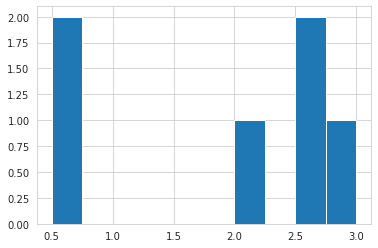

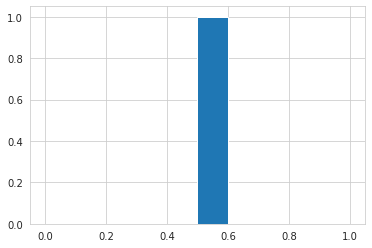

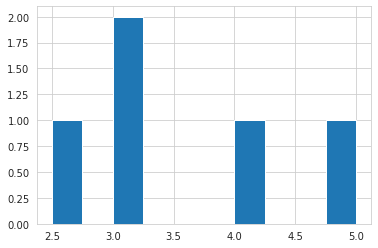

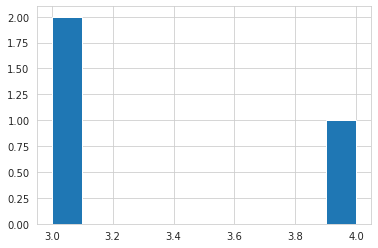

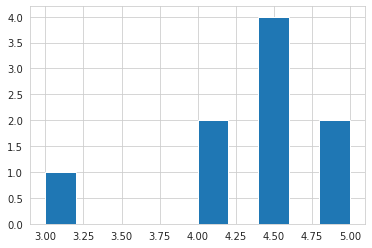

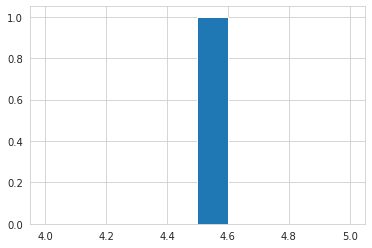

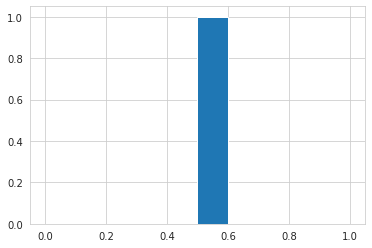

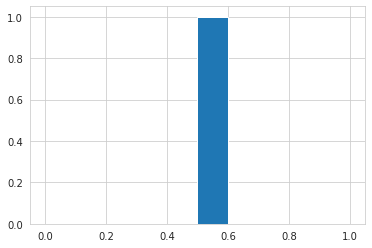

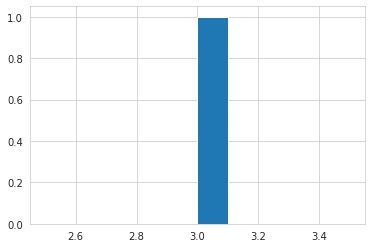

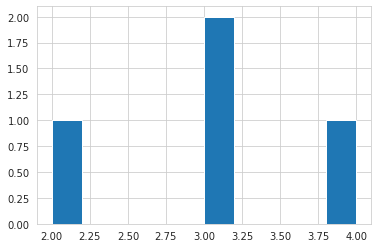

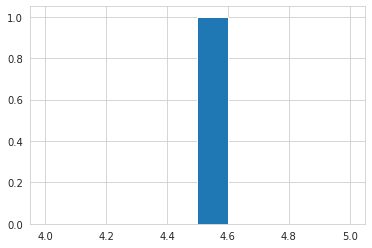

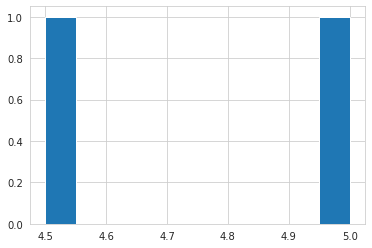

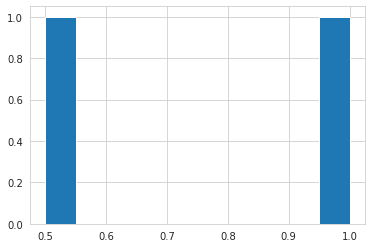

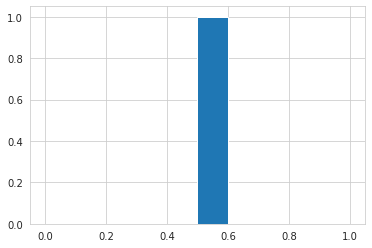

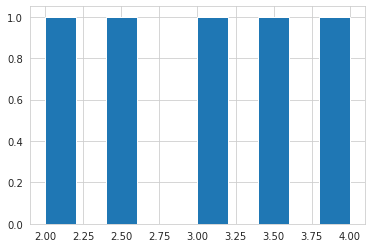

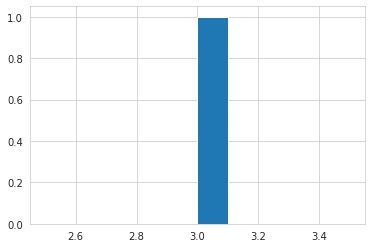

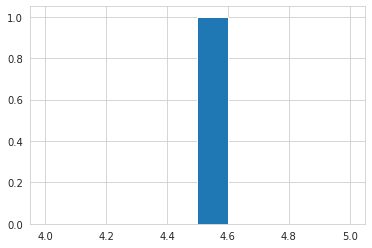

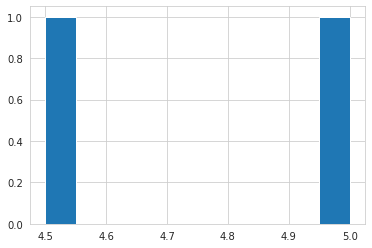

In [0]:
lista_ex = [33164,151745,3342,146,171763,51314,67799,4051,50356,3500,59018,32582,55292,92681,5027,85438,108981,185135]
for i in lista_ex:
  plot_filmes(i)

Analisando os gráficos dispostos acima, é possível perceber que vários filmes com as medidas muitos próximas ou iguais aos valores destacados pelo Allan tiveram apenas um voto. As demais medidas que se distanciou um pouco mais desses valores determindos pelo Allan, representam filmes com mais votos e com variabilidade maior também.

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmesId=={n}")["nota"]
  print(notas_do_filme.describe())
  print('\n')
  fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize = (12, 8))
  notas_do_filme.plot(ax=ax1, kind='hist', subplots=True)
  notas_do_filme.plot.box(ax=ax2, subplots=True)
  plt.show()

count    9.000000
mean     4.333333
std      0.612372
min      3.000000
25%      4.000000
50%      4.500000
75%      4.500000
max      5.000000
Name: nota, dtype: float64




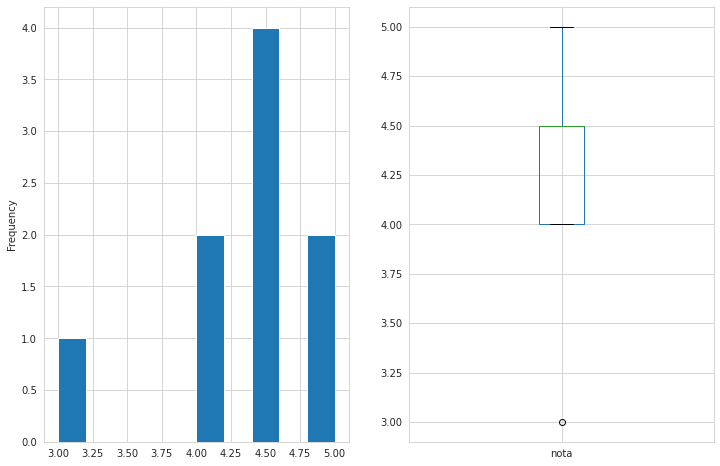

In [0]:
# Plotando o Box-Plot e o histograma do filme com mais votos(9), dentre os escolhidos do Desafio 5.
plot_filme(171763)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
# Criando uma coluna só com os anos dos filmes e apresentando as 5 primeiras linhas do DF.
filmes_com_media_voto['ano'] = filmes_com_media_voto['titulo'].str.extract(r"\(([0-9]+)\)", expand=True)
filmes_com_media_voto.head()

,filmesId,titulo,generos,nota_media,total_votos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,1995


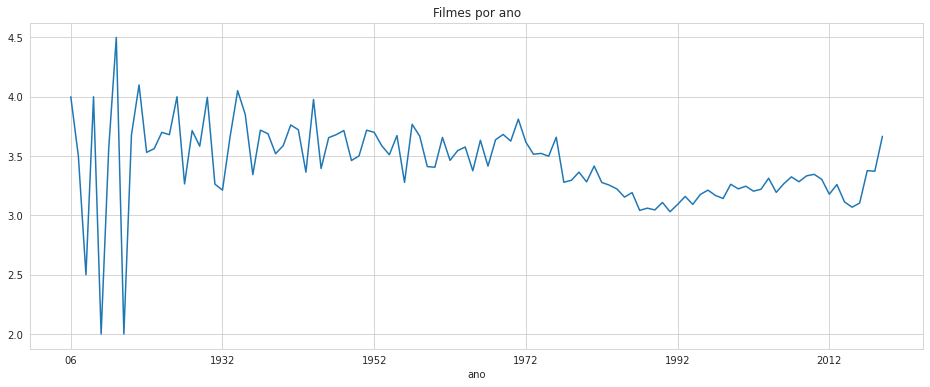

In [0]:
# Ordenando o DF de forma crescente por ano, separando a nota_media de filmes dos mesmo ano e aplicando a média novamente,
# para que obtenhamos a média de todos os filmes por anos e logo em seguida plotamos um gráfico para melhor representar essa informação.
filmes_por_ano = filmes_com_media_voto.sort_values('ano').groupby('ano')['nota_media'].mean()
filmes_por_ano.plot(
    title='Filmes por ano',
    figsize=(16,6))
plt.show()

In [0]:
# Verificando alguns valores dos anos e suas respectivas médias.
filmes_com_media_voto.sort_values('ano').groupby('ano')['nota_media'].mean()

In [0]:
# Verificando qual o ano com a maior média.
filmes_com_media_voto.sort_values('ano').groupby('ano')['nota_media'].mean().sort_values(ascending=False)

ano
1917    4.500000
1921    4.100000
1934    4.051190
06      4.000000
1908    4.000000
          ...   
1987    3.041854
1991    3.030564
1903    2.500000
1919    2.000000
1915    2.000000
Name: nota_media, Length: 108, dtype: float64

Com base no gráfico e nas informações dispostas acima, é possível perceber que há pelo menos dois erros (pode ser de digitação ou não) referentes ao primeiro e ao último valor dos anos, ao qual foge dos padrões dos dados.

Ademais, percebe-se que a maior média tem o valor de 4.5 e é referente ao ano de 1917, que fica entre as duas menores médias referentes aos anos de 1915 e 1919 com o valor 2.